In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
MedValData = pd.read_csv('train.csv')
MedValData

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...,...
37132,37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


In [10]:
y = MedValData.MedHouseVal

In [12]:
Med_features = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']
x = MedValData[Med_features]
x.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329
std,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028
min,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000
25%,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000
50%,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000
75%,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000
max,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000


In [13]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41


In [16]:
from sklearn.tree import DecisionTreeRegressor
Medvalmodel = DecisionTreeRegressor(random_state=1)
Medvalmodel.fit(x, y)

DecisionTreeRegressor(random_state=1)

In [17]:
print("Making predictions for the following 5 houses:")
print(x.head())
print("The predictions are")
print(Medvalmodel.predict(x.head()))

Making predictions for the following 5 houses:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.3859      15.0  3.827160   1.112100      1280.0  2.486989     34.60   
1  3.7188      17.0  6.013373   1.054217      1504.0  3.813084     38.69   
2  4.7750      27.0  6.535604   1.103175      1061.0  2.464602     34.71   
3  2.4138      16.0  3.350203   0.965432      1255.0  2.089286     32.66   
4  3.7500      52.0  4.284404   1.069246      1793.0  1.604790     37.80   

   Longitude  
0    -120.12  
1    -121.22  
2    -120.45  
3    -117.09  
4    -122.41  
The predictions are
[0.98  0.946 1.576 1.336 4.5  ]


In [22]:
from sklearn.metrics import mean_absolute_error
medvalmodel = Medvalmodel.predict(x)
print(medvalmodel)

[0.98  0.946 1.576 ... 3.387 1.592 0.652]


In [23]:
mean_absolute_error(y, medvalmodel)

3.661580527670226e-17

In [27]:
test_data = pd.read_csv('test.csv')
print(test_data)

          id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0      37137  1.7062      35.0  4.966368   1.096539      1318.0  2.844411   
1      37138  1.3882      22.0  4.187035   1.098229      2296.0  3.180218   
2      37139  7.7197      21.0  7.129436   0.959276      1535.0  2.888889   
3      37140  4.6806      49.0  4.769697   1.048485       707.0  1.743590   
4      37141  3.1284      25.0  3.765306   1.081633      4716.0  2.003827   
...      ...     ...       ...       ...        ...         ...       ...   
24754  61891  2.2875      34.0  3.914729   1.085271       866.0  2.071429   
24755  61892  3.0781      33.0  4.771971   1.038674      1628.0  2.326848   
24756  61893  2.6961      14.0  4.593960   1.170380      3900.0  2.540034   
24757  61894  7.2315       8.0  7.508403   1.018692      1388.0  2.601202   
24758  61895  5.7260      30.0  6.000000   1.000000        15.0  2.500000   

       Latitude  Longitude  
0         39.75    -121.85  
1         33.95  

In [28]:
test_features = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']
x_test = test_data[test_features]
x_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000
mean,3.832618,26.041561,5.168789,1.063599,1679.327548,2.830808,35.598007,-119.570208
std,1.797503,12.177907,1.252874,0.123630,1365.598976,1.615320,2.097787,1.977200
min,0.499900,2.000000,1.000000,0.560000,3.000000,0.764706,32.550000,-124.230000
25%,2.590150,17.000000,4.356443,1.020460,955.000000,2.400000,33.930000,-121.800000
50%,3.504600,25.000000,5.077143,1.054094,1398.000000,2.751592,34.200000,-118.460000
75%,4.687500,35.000000,5.858646,1.088295,1874.000000,3.129167,37.720000,-118.020000
max,15.000100,52.000000,56.269231,10.500000,35682.000000,230.172414,41.950000,-114.550000


In [29]:
x_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
1,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
2,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
3,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
4,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29


In [36]:
from sklearn.tree import DecisionTreeRegressor
Medvalmodel = DecisionTreeRegressor(random_state=2)
Medvalmodel.fit(x, y)

DecisionTreeRegressor(random_state=2)

In [37]:
print(Medvalmodel.predict(x_test.head()))

[0.768   0.842   3.575   5.00001 3.2    ]


In [39]:
predictions = Medvalmodel.predict(x_test)
print(predictions)

[0.768 0.842 3.575 ... 1.125 4.622 4.328]


In [40]:
x_test.shape

(24759, 8)

In [41]:
predictions.shape

(24759,)

In [64]:
pred = pd.DataFrame(predictions, columns=['Predictions'])
pred

,Predictions
0,0.76800
1,0.84200
2,3.57500
3,5.00001
4,3.20000
...,...
24754,1.15000
24755,1.81700
24756,1.12500
24757,4.62200


In [70]:
z = test_data.id

In [72]:
pred['ID'] = z
pred

,Predictions,ID
0,0.76800,37137
1,0.84200,37138
2,3.57500,37139
3,5.00001,37140
4,3.20000,37141
...,...,...
24754,1.15000,61891
24755,1.81700,61892
24756,1.12500,61893
24757,4.62200,61894


In [79]:
my_pred = pd.DataFrame(predictions, columns=['Predictions'])
q = test_data.id
my_pred['ID'] = q
my_pred

,Predictions,ID
0,0.76800,37137
1,0.84200,37138
2,3.57500,37139
3,5.00001,37140
4,3.20000,37141
...,...,...
24754,1.15000,61891
24755,1.81700,61892
24756,1.12500,61893
24757,4.62200,61894


In [80]:
my_pred = my_pred[['ID','Predictions']]
my_pred

,ID,Predictions
0,37137,0.76800
1,37138,0.84200
2,37139,3.57500
3,37140,5.00001
4,37141,3.20000
...,...,...
24754,61891,1.15000
24755,61892,1.81700
24756,61893,1.12500
24757,61894,4.62200


In [81]:
my_pred.to_csv('Predictions.csv')

,Unnamed: 0,ID,Predictions
0,0,37137,0.76800
1,1,37138,0.84200
2,2,37139,3.57500
3,3,37140,5.00001
4,4,37141,3.20000
...,...,...,...
24754,24754,61891,1.15000
24755,24755,61892,1.81700
24756,24756,61893,1.12500
24757,24757,61894,4.62200


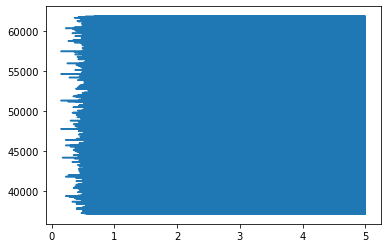